# __Life Expectancy and GDP Codecademy Project__

## Importing neccessary packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading in the dataset.

In [2]:
df = pd.read_csv('all_data.csv')

## Displaying the first 5 rows of the dataset.

In [3]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Dataset contains 4 columns and 96 observations.

In [4]:
df.shape

(96, 4)

## No missing observations contained in dataset.

In [5]:
df.isna().sum()

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

## Dataset conatains data on six different countries:
- China
- Chile
- Germany
- Mexico
- USA
- Zimbabwe

In [6]:
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

## Initial Summary Statistics.

In [7]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


## Typecasting the year column to year format.

In [8]:
df.Year = df.Year.astype(str).astype('period[Y]')

df.Year.dtype

period[Y-DEC]

## This dataset spans 15 years (2000 - 2015).

In [9]:
print("The earliest year in the dataset is: " + str(np.min(df.Year)) + "\nThe latest year in the ddatset is: " + str(np.max(df.Year)))

The earliest year in the dataset is: 2000
The latest year in the ddatset is: 2015


# __Life Expectancy__

## Renaming the Life Expetancy Column for easier access

In [10]:
df = df.rename(columns= {'Life expectancy at birth (years)': 'life_expectancy'})

df.head()

,Country,Year,life_expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Average Life Expectancy by country in descending order:
- Germany: 79.66
- Chile: 78.94
- USA: 78.06
- Mexico: 75.72
- China: 74.26
- Zimbabwe: 50.09

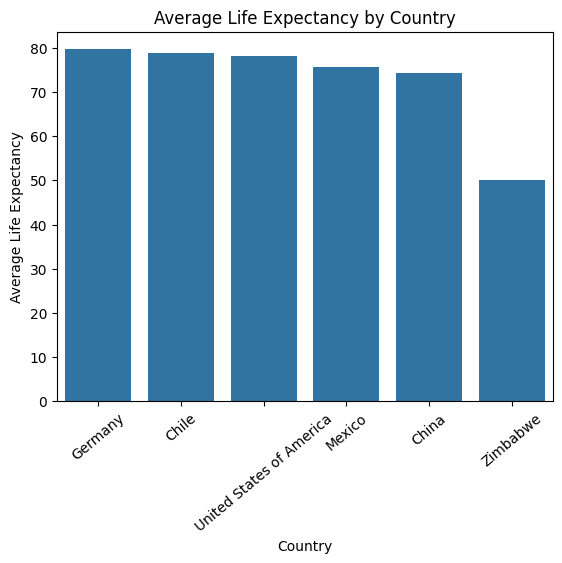

<Figure size 640x480 with 0 Axes>

In [11]:
average_life_expectancy = df.groupby('Country')['life_expectancy'].mean().round(2)

sns.barplot(average_life_expectancy, order= average_life_expectancy.sort_values(ascending=False).index)

plt.title('Average Life Expectancy by Country')

plt.ylabel('Average Life Expectancy')

plt.xticks(rotation=40)

plt.style.use('dark_background')

plt.show()
plt.clf()

## Boxplots of life expectancy by each respective country

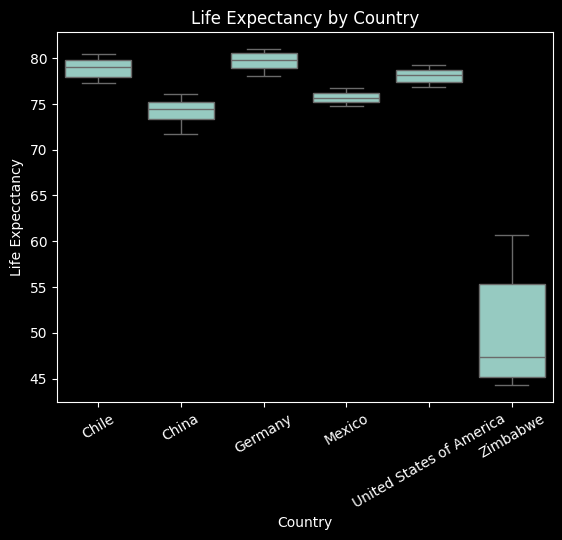

<Figure size 640x480 with 0 Axes>

In [12]:
sns.boxplot(data= df, x= 'Country', y= 'life_expectancy')

plt.title('Life Expectancy by Country')

plt.ylabel('Life Expecctancy')

plt.xticks(rotation= 30)

plt.show()
plt.clf()

## Boxplots excluding Zimbabwe

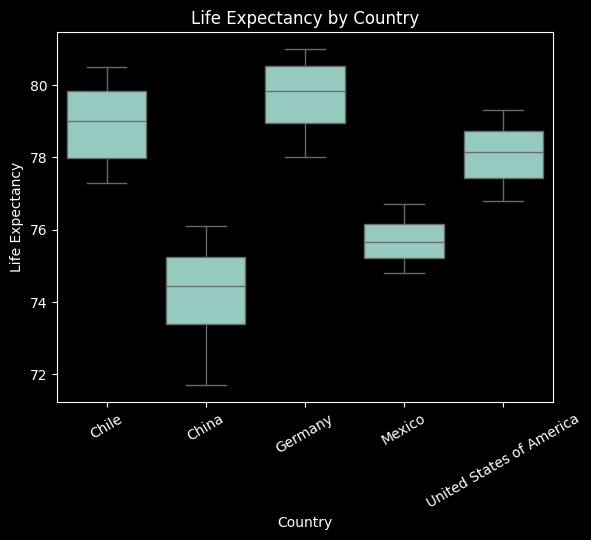

<Figure size 640x480 with 0 Axes>

In [13]:
df_no_zimbabwe = df[df.Country != 'Zimbabwe']

sns.boxplot(data= df_no_zimbabwe, x= 'Country', y= 'life_expectancy')

plt.title('Life Expectancy by Country')

plt.ylabel('Life Expectancy')

plt.xticks(rotation= 30)

plt.show()
plt.clf()

## Life expectancy over time.

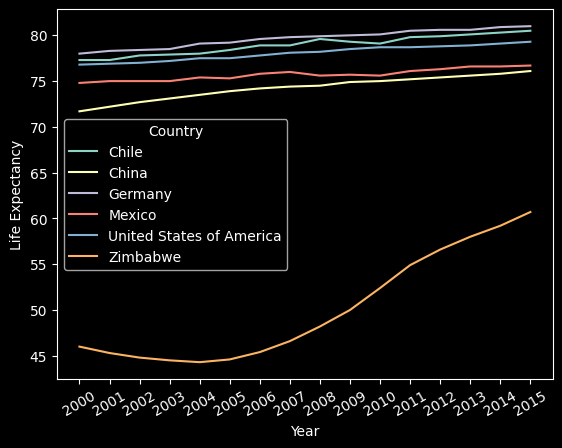

<Figure size 640x480 with 0 Axes>

In [14]:
sns.lineplot(x= df.Year.astype(str), y= df.life_expectancy, hue= df.Country)

plt.ylabel('Life Expectancy')

plt.xticks(rotation= 30)

plt.show()
plt.clf()

## Life expectancy over time excluding Zimbabwe.

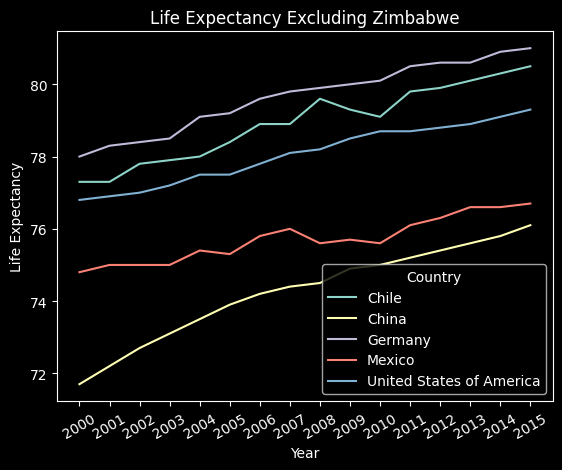

<Figure size 640x480 with 0 Axes>

In [15]:
sns.lineplot(x= df_no_zimbabwe.Year.astype(str), y= df_no_zimbabwe.life_expectancy, hue= df_no_zimbabwe.Country)

plt.xticks(rotation= 30)

plt.title('Life Expectancy Excluding Zimbabwe')

plt.ylabel('Life Expectancy')

plt.show()
plt.clf()

## Zimbabwe plot over time. Notable trend shift around 2007.

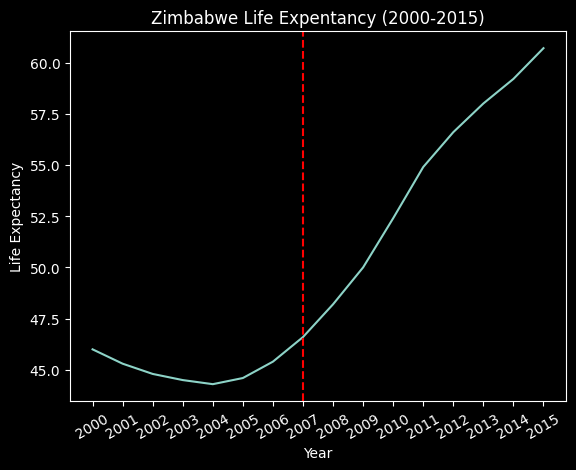

<Figure size 640x480 with 0 Axes>

In [16]:
df_zimbabwe = df[df.Country == 'Zimbabwe'].copy()

sns.lineplot(x= df_zimbabwe.Year.astype(str), y= df_zimbabwe.life_expectancy)

plt.axvline('2007', color= 'r', linestyle= 'dashed')

plt.title('Zimbabwe Life Expentancy (2000-2015)')

plt.ylabel('Life Expectancy')

plt.xticks(rotation= 30)

plt.show()
plt.clf()

## Histogram of Life Expectancy Feature (left skewed).

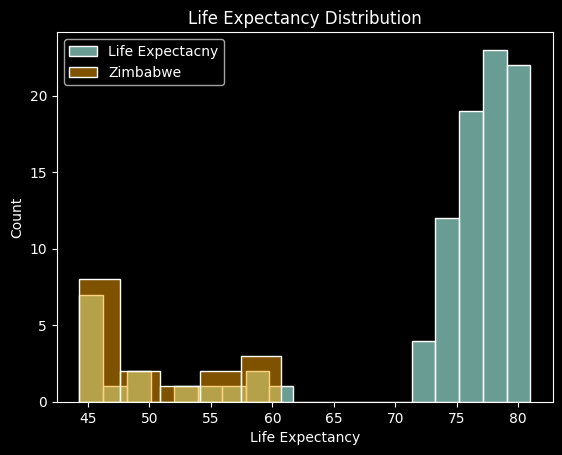

<Figure size 640x480 with 0 Axes>

In [17]:
sns.histplot(df['life_expectancy'])

sns.histplot(df_zimbabwe['life_expectancy'], alpha= 0.50, color= 'orange')

plt.title('Life Expectancy Distribution')

plt.xlabel('Life Expectancy')

plt.legend(['Life Expectacny', 'Zimbabwe'])

plt.show()
plt.clf()

## Obtaining the sample mean of Life Expectancy for the entire dataset.
- Sample Mean: 72.81
- Standard Error: 1.0836
- Margin of Error: [ 70.06 | 72.81 | 74.93 ]

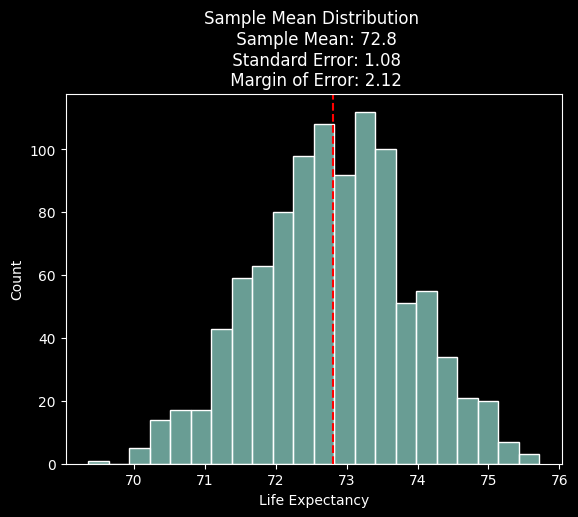

<Figure size 640x480 with 0 Axes>

In [18]:
samp_means = []

for i in range(1000):
    samp = np.random.choice(df.life_expectancy, size= 50, replace= False)
    this_mean = samp.mean()
    samp_means.append(this_mean)

dist_mean = np.mean(samp_means)

stan_error = np.std(df.life_expectancy) / df.shape[0] ** 0.5 

margin_of_error = stan_error * 1.96

sns.histplot(samp_means)

plt.title(f'Sample Mean Distribution \n Sample Mean: {dist_mean.round(2)}\n Standard Error: {stan_error.round(2)}\n Margin of Error: {abs(margin_of_error.round(2))}')

plt.axvline(dist_mean, color= 'red', linestyle= 'dashed')

plt.xlabel('Life Expectancy')

plt.show()
plt.clf()

## Creating a pivot table containing life expectancy data for the years 2000 and 2015 respectively.

In [19]:
life_exp_pivot = df.pivot(columns= 'Year', index= 'Country', values= 'life_expectancy')

two_vs_15 = life_exp_pivot[['2000', '2015']].copy()

two_vs_15

Year,2000,2015
Country,,
Chile,77.3,80.5
China,71.7,76.1
Germany,78.0,81.0
Mexico,74.8,76.7
United States of America,76.8,79.3
Zimbabwe,46.0,60.7


## Creating new percent change column in the life expectancy dataframe

In [20]:
two_vs_15['percent_change'] = round((life_exp_pivot['2015'] - life_exp_pivot['2000']) / abs(life_exp_pivot['2000']) * 100, 2)


two_vs_15.sort_values(by= ['percent_change'], ascending= False)

Year,2000,2015,percent_change
Country,,,
Zimbabwe,46.0,60.7,31.96
China,71.7,76.1,6.14
Chile,77.3,80.5,4.14
Germany,78.0,81.0,3.85
United States of America,76.8,79.3,3.26
Mexico,74.8,76.7,2.54


## Ploting life expetancy for the year 2000 & 2015 along with the percentage increase for each country.

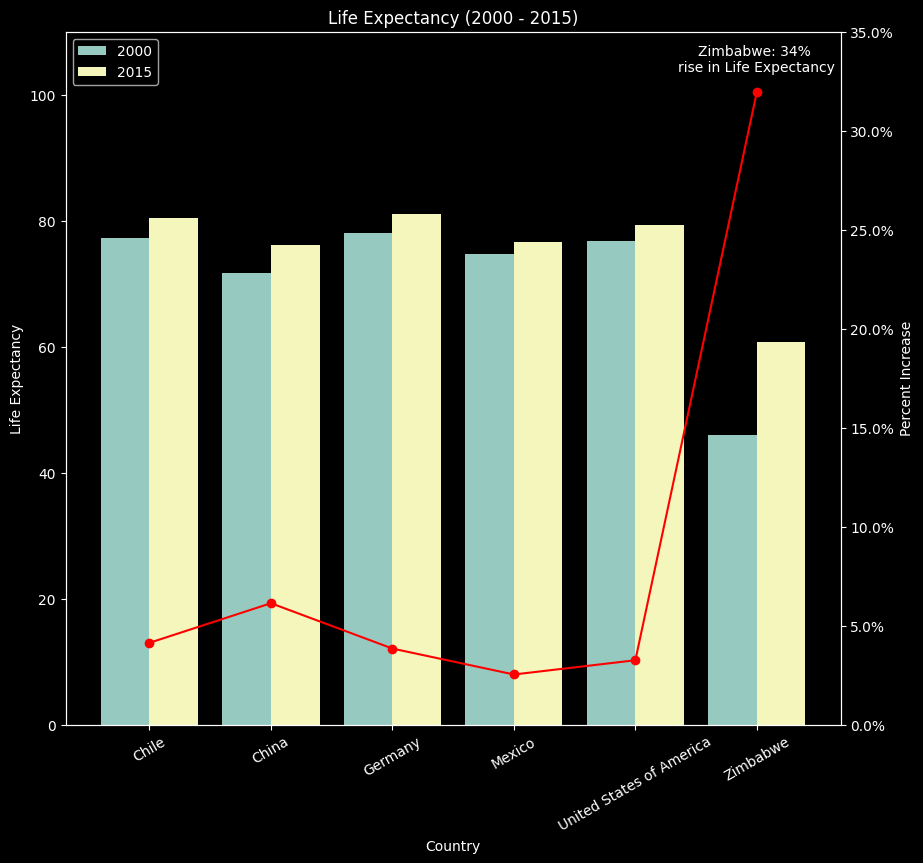

<Figure size 640x480 with 0 Axes>

In [21]:
df_00_15_life_exp = df[(df.Year == '2000') | (df.Year == '2015')]

fig, ax = plt.subplots(figsize=(10, 9))
                               
sns.barplot(data= df_00_15_life_exp, x= 'Country', y= 'life_expectancy', hue= 'Year')

ax.set_ylim(0 , 110)

plt.legend(loc= 'upper left')

ax2 = ax.twinx()

ax2.plot(two_vs_15.index, two_vs_15['percent_change'], marker= 'o', color= 'r')

plt.title('Life Expectancy (2000 - 2015)')

ax.set_xticks(ax.get_xticks())

ax.set_xticklabels(ax.get_xticklabels(), rotation= 30)

ax.set_ylabel('Life Expectancy')

ax2.set_ylabel('Percent Increase')

yticks = ax2.get_yticks()

plt.annotate('Zimbabwe: 34% \nrise in Life Expectancy', xy= ('Zimbabwe', 33), ha= 'center')

ax2.set_yticks(yticks, labels= [f"{y}%" for y in yticks])

plt.show()
plt.clf()

## Year over year increase in Zimbabwe Life Expectancy (2000-2015)

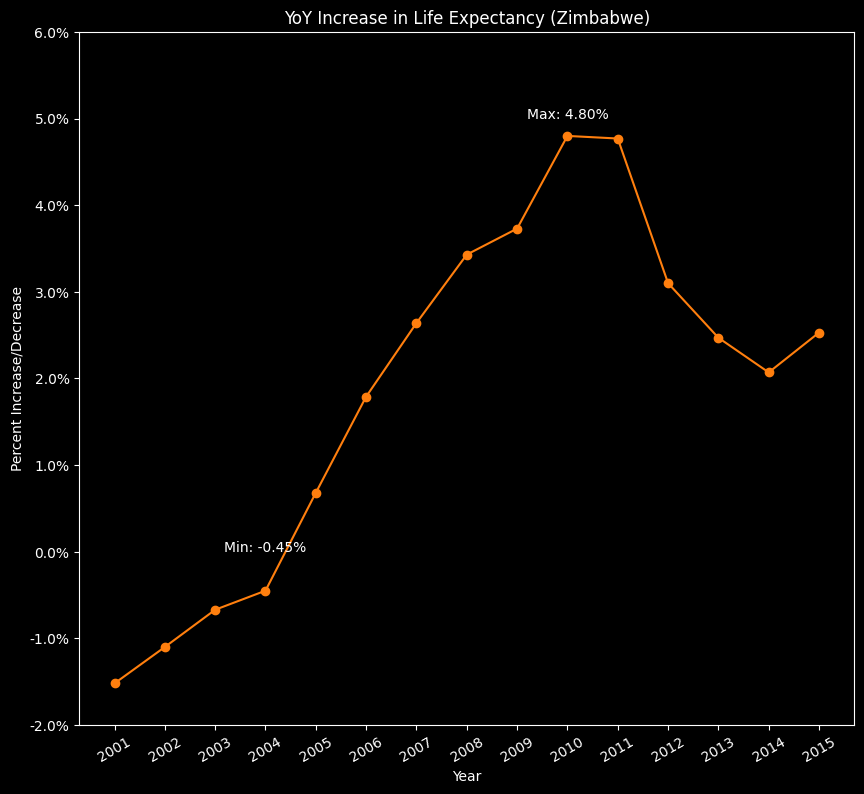

<Figure size 640x480 with 0 Axes>

In [22]:
df_zimbabwe['YoY_increase'] = df_zimbabwe.life_expectancy.pct_change() * 100

df_zimbabwe['YoY_increase'] = df_zimbabwe['YoY_increase'].round(2)


fig, ax = plt.subplots(figsize=(10, 9))

ax.plot(df_zimbabwe['Year'].astype(str), df_zimbabwe['YoY_increase'], color= "tab:orange", marker= 'o')

plt.title("YoY Increase in Life Expectancy (Zimbabwe)")

yticks = ax.get_yticks()

ax.set_yticks(yticks, labels= [f"{y}%" for y in yticks])

ax.set_ylabel('Percent Increase/Decrease')

plt.xticks(rotation= 30)

ax.set_xlabel('Year')

plt.annotate('Max: 4.80%', xy= ('2010', 5), ha= 'center')

plt.annotate('Min: -0.45%', xy= ('2004', 0), ha= 'center')

plt.show()
plt.clf()

# __GDP__

## Creating a function that makes the GDP column more readable

In [23]:
def format_gdp(x):
    if x >= 1e12:
        return f"${x / 1e12: .2f}T" #formats #'s in the trillions to decimal for example $1.02T
    elif x >= 1e9:
        return f"${x / 1e9: .2f}B" #formats #'s in the billions to decimal for example $1.02B
    else:
        return f"${x:,.2f}" # formats #'s with commas to denote thousands or millions

## Creating formated GDP column for easier readability

In [24]:
df['formated_GDP'] = df.GDP.apply(lambda x: format_gdp(x))

df.sort_values(by= 'GDP',ascending=False).head()

,Country,Year,life_expectancy,GDP,formated_GDP
79,United States of America,2015,79.3,1.810000e+13,$ 18.10T
78,United States of America,2014,79.1,1.740000e+13,$ 17.40T
77,United States of America,2013,78.9,1.670000e+13,$ 16.70T
76,United States of America,2012,78.8,1.620000e+13,$ 16.20T
75,United States of America,2011,78.7,1.550000e+13,$ 15.50T


## Average GDP by Country in Descending Order.

In [25]:
gdp_by_country = df.groupby('Country').GDP.mean()

gdp_by_country = gdp_by_country.sort_values(ascending= False)

gdp_by_country2 = gdp_by_country.apply(lambda x: format_gdp(x))

gdp_by_country2

Country
United States of America     $ 14.07T
China                         $ 4.96T
Germany                       $ 3.09T
Mexico                      $ 976.65B
Chile                       $ 169.79B
Zimbabwe                      $ 9.06B
Name: GDP, dtype: object

# Bar Plot of Average GDP by country in descending order.

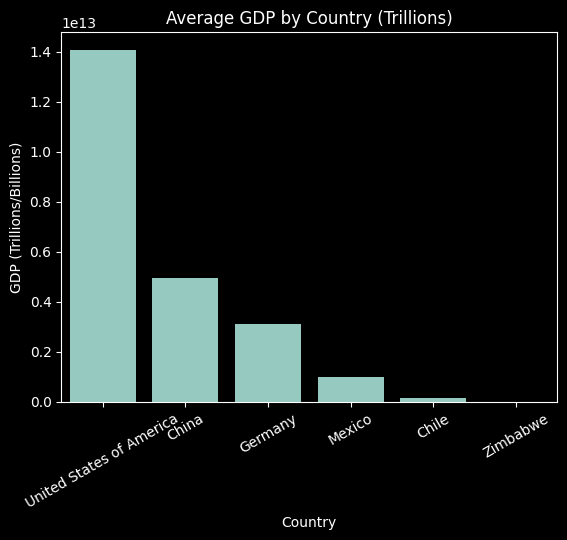

<Figure size 640x480 with 0 Axes>

In [26]:
sns.barplot(gdp_by_country, order= gdp_by_country.sort_values(ascending= False).index)

plt.xticks(rotation= 30)

plt.title('Average GDP by Country (Trillions)')

plt.ylabel('GDP (Trillions/Billions)')

plt.show()
plt.clf()

## Zooming in on Chile and Zimbabwe:
- Chile: 169.8 _B_ 
- Zimbabwe: 9.1 _B_

Text(0, 0.5, 'GDP (Trillions/Billions)')

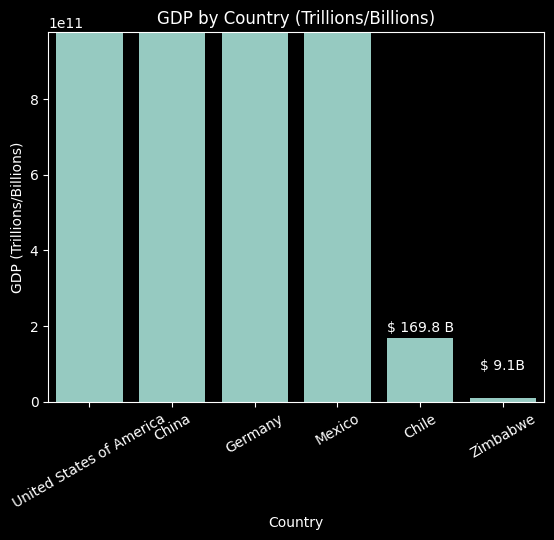

In [27]:
fig, ax = plt.subplots()

sns.barplot(gdp_by_country, order= gdp_by_country.sort_values(ascending= False).index)

plt.xticks(rotation= 30)

plt.title('GDP by Country (Trillions/Billions)')

plt.annotate('$ 169.8 B', xy= ('Chile', 2.000e11), va= 'center_baseline', ha= 'center')

plt.annotate('$ 9.1B', xy= ('Zimbabwe', 1.000e11), va= 'center_baseline', ha= 'center')

ax.set_ylim((0.0, 9.766506e+11))

plt.ylabel('GDP (Trillions/Billions)')

## Lineplot of GDP by Country

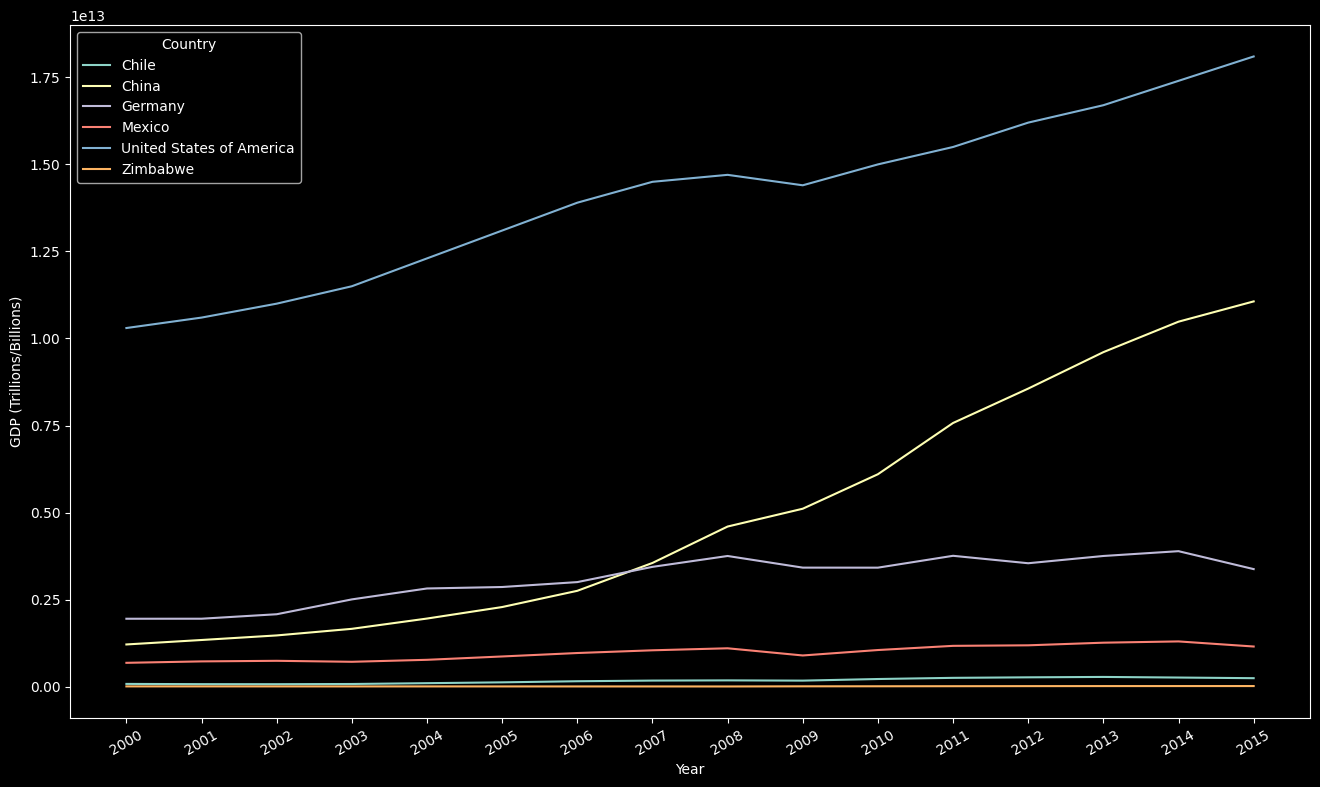

<Figure size 640x480 with 0 Axes>

In [28]:
fig, ax = plt.subplots(figsize=(16, 9))

sns.lineplot(x= df.Year.astype(str), y= df.GDP, hue= df.Country)

plt.xticks(rotation= 30)

plt.ylabel('GDP (Trillions/Billions)')

plt.show()
plt.clf()

## Distribution of GDP over time (2000 - 2015)

Text(0.5, 1.0, 'GDP by Country Distribution (2000 - 2015)')

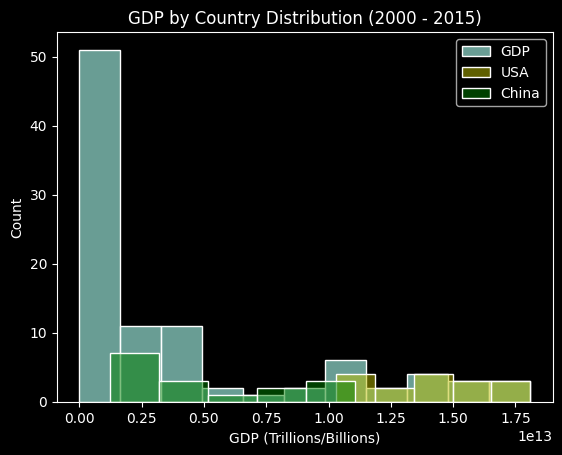

In [29]:
fig, ax = plt.subplots()

sns.histplot(df.GDP)

sns.histplot(df.GDP[df.Country == 'United States of America'], alpha= 0.5, color= 'y')

sns.histplot(df.GDP[df.Country == 'China'], alpha= 0.5, color= 'g')

plt.xlabel('GDP (Trillions/Billions)')

plt.legend(['GDP', 'USA', 'China'])

plt.title('GDP by Country Distribution (2000 - 2015)')

# USA/China GDP Comparison 

Text(0, 0.5, 'GDP (Trillions/Billions)')

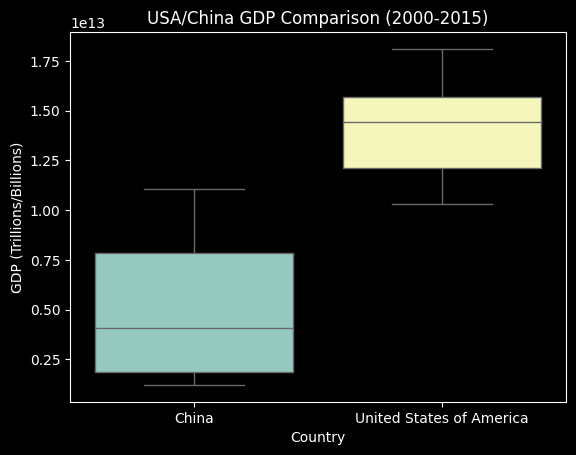

In [30]:
usa_vs_china_gdp = df[(df.Country == 'United States of America') | (df.Country == 'China')]

fig, ax = plt.subplots()
sns.boxplot(x= usa_vs_china_gdp.Country, y= usa_vs_china_gdp.GDP, hue= usa_vs_china_gdp.Country)

plt.title('USA/China GDP Comparison (2000-2015)')

plt.ylabel('GDP (Trillions/Billions)')

## Creating pivot table with values for the year 2000 & 2015. Adding percent change columns & sorting from highest to lowest.



In [31]:
gdp_pivot = df.pivot(columns= 'Year', index= 'Country', values= 'GDP')

gdp_2000_2015 = gdp_pivot[['2000', '2015']].copy()

gdp_2000_2015['percent_change'] = round((gdp_2000_2015['2015'] - gdp_2000_2015['2000']) / abs(gdp_2000_2015['2000']) * 100, 2)

gdp_2000_2015.sort_values(by= ['percent_change'], ascending=False)

Year,2000,2015,percent_change
Country,,,
China,1.211350e+12,1.106470e+13,813.42
Chile,7.786093e+10,2.425180e+11,211.48
Zimbabwe,6.689958e+09,1.630467e+10,143.72
United States of America,1.030000e+13,1.810000e+13,75.73
Germany,1.949950e+12,3.375610e+12,73.11
Mexico,6.836480e+11,1.152260e+12,68.55


## Plotting GDP/Percent Increase by Country for the Year 2000 - 2015

Text(Zimbabwe, 200, 'Zimbabwe: \n+ 143.72%')

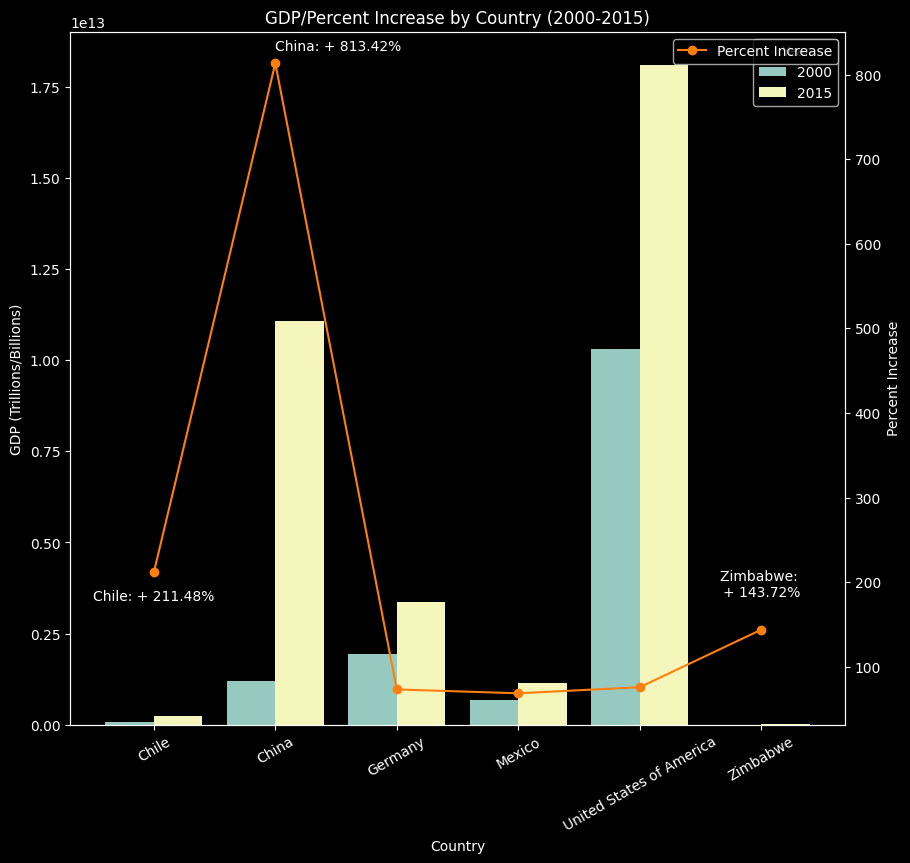

In [32]:
gdp_two_15 = df[(df.Year == '2000') | (df.Year == '2015')]

fig, ax = plt.subplots(figsize=(10,9))

sns.barplot(data= gdp_two_15, x= 'Country', y= 'GDP', hue= 'Year')

plt.xticks(rotation= 30)

plt.ylabel('GDP (Trillions/Billions)')

ax2 = ax.twinx()

ax2.plot(gdp_2000_2015['percent_change'], marker= 'o', color= 'tab:orange')

plt.title('GDP/Percent Increase by Country (2000-2015)') 

ax2.set_ylabel('Percent Increase')

plt.legend(['Percent Increase', '2000', '2015'])

plt.annotate('Chile: + 211.48%', xy= ('Chile', 185), va= 'center_baseline', ha= 'center')

plt.annotate('China: + 813.42%', xy= ('China', 835), va= 'center_baseline', ha= 'left')

plt.annotate('Zimbabwe: \n+ 143.72%', xy= ('Zimbabwe', 200), va= 'center_baseline', ha= 'center')

## Line Plot of China and Germany GDP. Notably China surpases Germany around the year 2007.

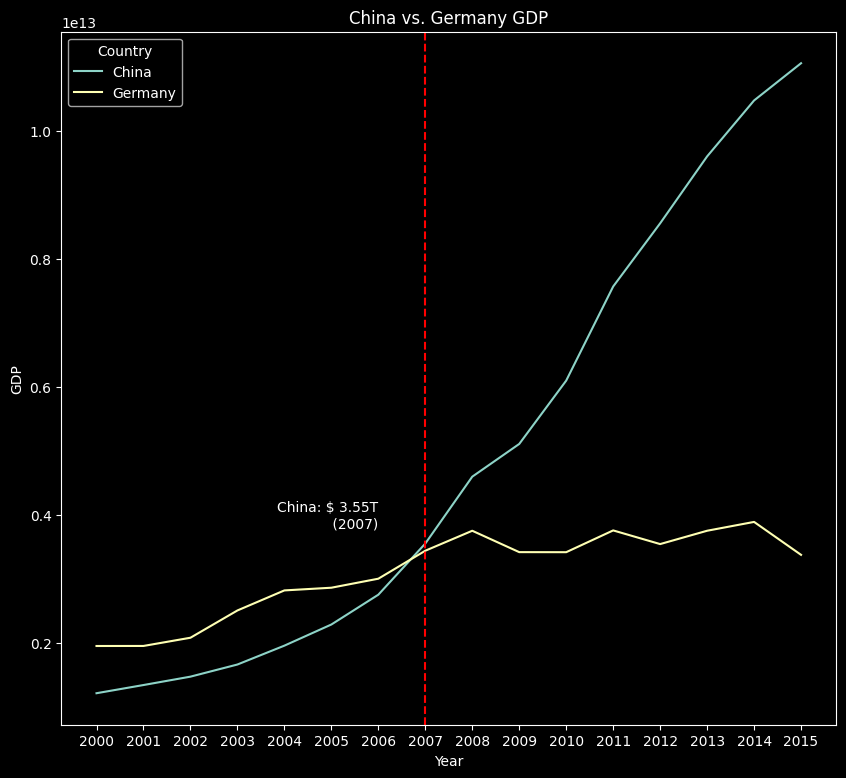

In [33]:
china_vs_germ = df[(df.Country == 'China') | (df.Country == 'Germany')]

fig, ax = plt.subplots(figsize=(10, 9))

sns.lineplot(data= china_vs_germ, x= china_vs_germ.Year.astype(str), y= 'GDP', hue = 'Country')

plt.title('China vs. Germany GDP')

plt.annotate('China: $ 3.55T\n (2007)', xy= ('2006', 3.802180e+12), ha= 'right')

plt.axvline('2007', color= 'r', linestyle= 'dashed')

## USA and Chinese Economies are higly positively correlated. Pearson Correlation: 0.9476

In [34]:
us_china_pivot = df.pivot(columns= 'Country', index= 'Year', values= 'GDP')

us_china = us_china_pivot[['China', 'United States of America']].copy()

us_china = us_china.reset_index()

us_china = us_china.drop(columns= 'Year')

us_china_correlation = us_china.corr(method= 'pearson')

us_china_correlation

Country,China,United States of America
Country,,
China,1.000000,0.947679
United States of America,0.947679,1.000000


## China & USA heatmap

<Axes: xlabel='Country', ylabel='Country'>

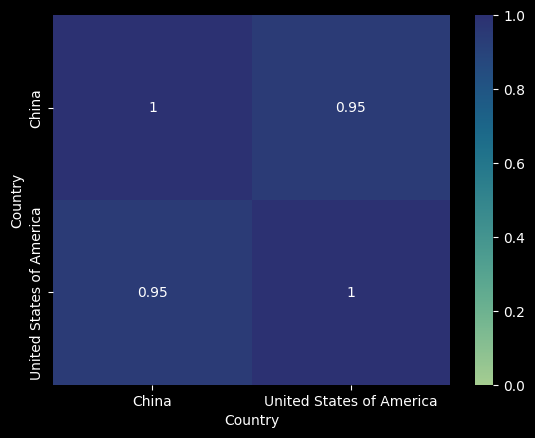

In [35]:
sns.heatmap(us_china_correlation, vmin= 0.0, vmax= 1.0, annot= True, cmap= 'crest')

## Lineplot showing the US and Chinese economies moving in unison.

Text(0, 0.5, 'GDP (Trillions/Billions)')

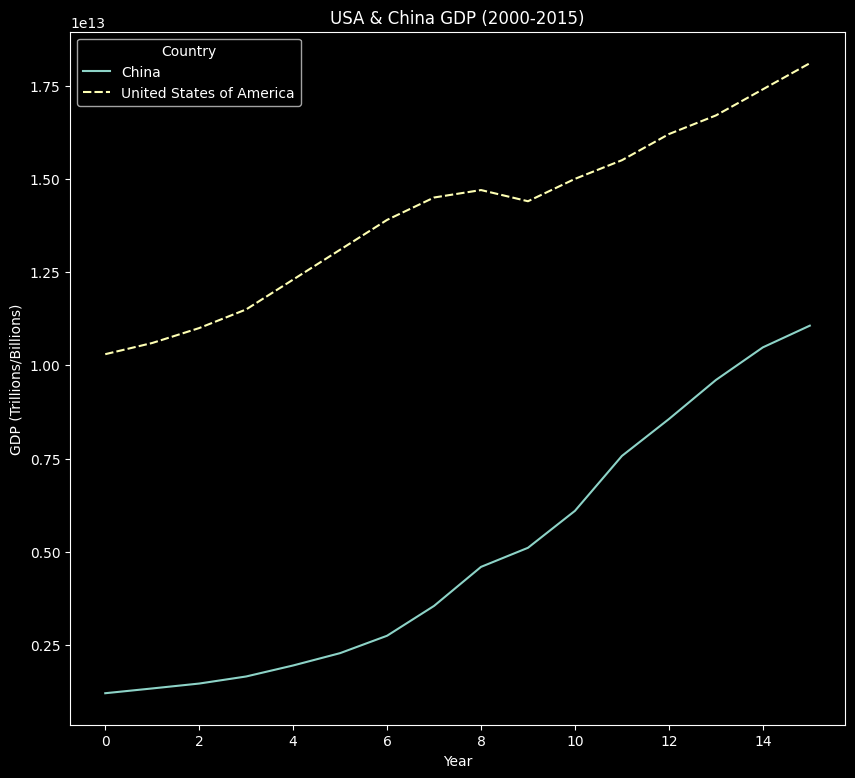

In [36]:
fig, ax = plt.subplots(figsize=(10, 9))

sns.lineplot(us_china)

plt.title('USA & China GDP (2000-2015)')

plt.xlabel('Year')

plt.ylabel('GDP (Trillions/Billions)')

## The Chinese economy grew at an average annual rate of 16%

In [37]:
china_gdp = df[df.Country == 'China']

china_gdp = china_gdp[['Year', 'GDP']].copy()

china_gdp['percent_increase'] = china_gdp.GDP.pct_change() * 100

china_gdp['percent_increase'].mean().round()

np.float64(16.0)

## Barplot of Year over Year Percent Growth in Chinese GDP

Text(2006, 25, '20.39%')

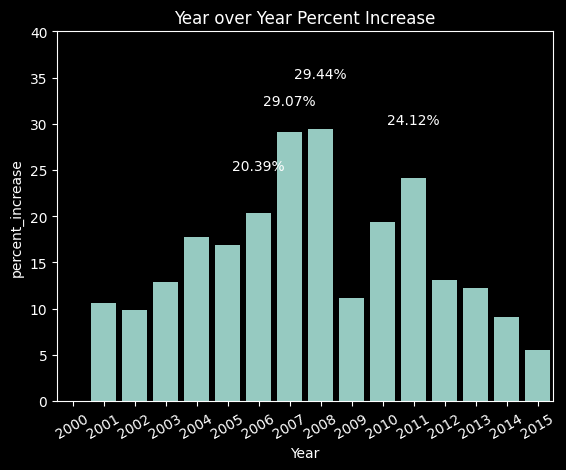

In [38]:
sns.barplot(data= china_gdp, x= 'Year', y= 'percent_increase')

plt.xticks(rotation= 30)

plt.title("Year over Year Percent Increase (China)")

plt.ylim(0, 40)

plt.annotate("29.44%", xy= ('2008', 35), ha= 'center')

plt.annotate('29.07%', xy= ('2007', 32), ha= 'center')

plt.annotate('24.12%', xy= ('2011', 30), ha= 'center')

plt.annotate('20.39%', xy= ('2006', 25), ha= 'center')

# __GDP vs. Life Expectancy__


## Scatter plot w/ line showing a modest linear relationship.

Text(0.5, 29.140624999999986, 'Life Expectancy')

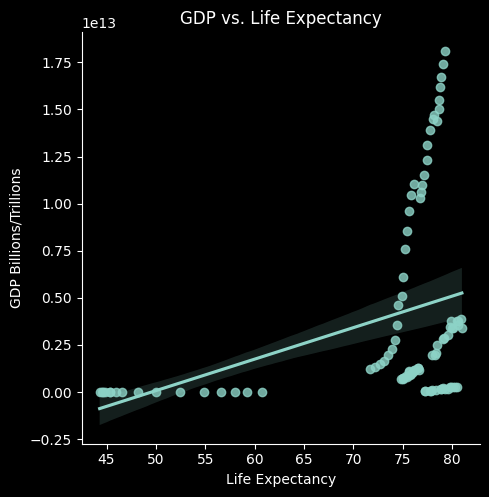

In [39]:
sns.lmplot(data= df, x= 'life_expectancy', y= 'GDP')

plt.title("GDP vs. Life Expectancy")

plt.ylabel("GDP Billions/Trillions")

plt.xlabel("Life Expectancy")

## Pearson corelation showing low positve correlation between Life Expectancy and GDP at the global level.



In [40]:
life_and_gdp = df[['GDP', 'life_expectancy']].copy()

life_and_gdp = life_and_gdp.corr(method='pearson')

life_and_gdp

,GDP,life_expectancy
GDP,1.000000,0.343207
life_expectancy,0.343207,1.000000


## Heatmap showing relatively weeak positive correlation at the global level.

<Axes: >

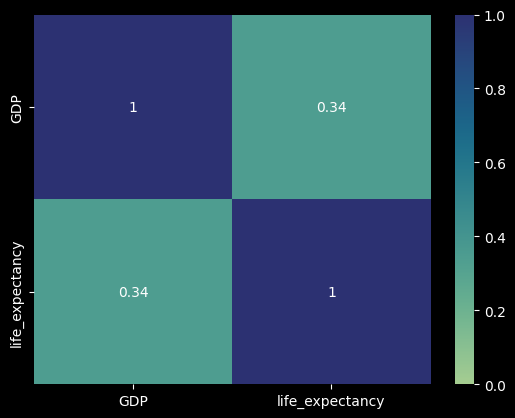

In [41]:
sns.heatmap(life_and_gdp, vmin= 0.0, vmax= 1.0, annot= True, cmap= 'crest')

## Filtering the diataframe by country for analysis at the country level.


In [42]:
united_states = df[df.Country == 'United States of America'].copy()
chile = df[df.Country == 'Chile'].copy()
china = df[df.Country == 'China'].copy()
zimbabwe = df[df.Country == 'Zimbabwe'].copy()
mexico = df[df.Country == 'Mexico'].copy()
germany = df[df.Country == 'Germany'].copy()

## Correlation appears to be much stronger at the country level.

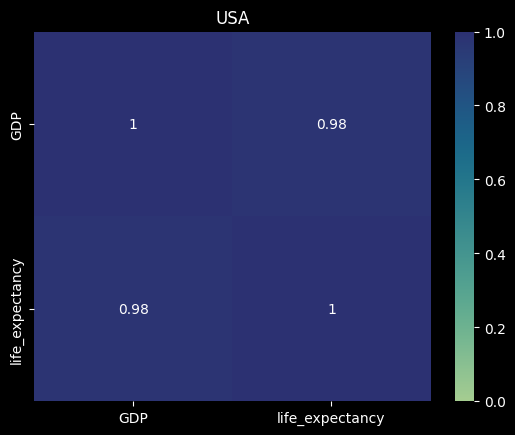

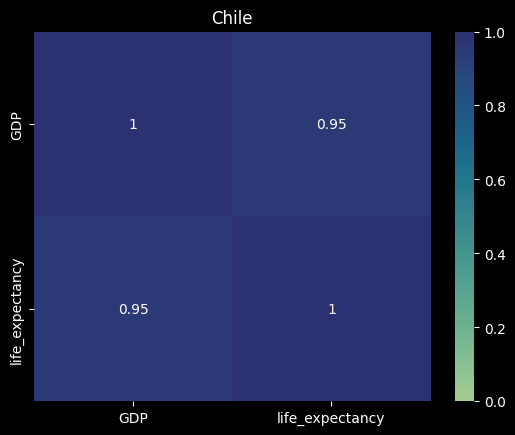

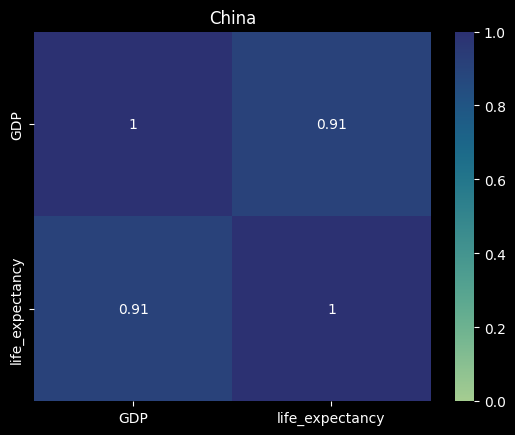

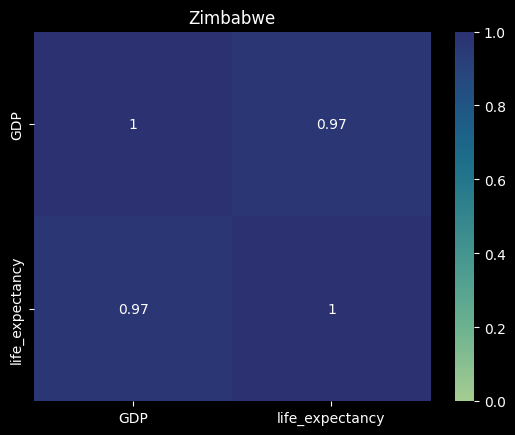

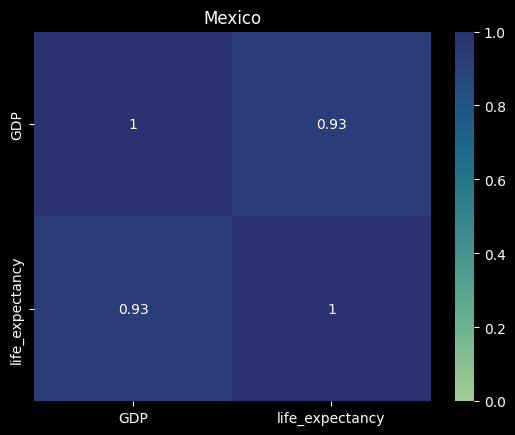

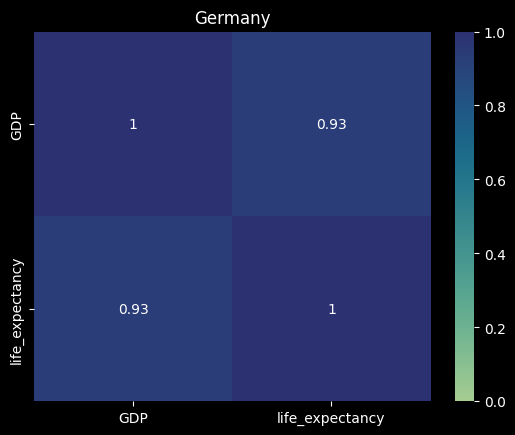

<Figure size 640x480 with 0 Axes>

In [43]:
countries = [united_states, chile, china, zimbabwe, mexico, germany]
country_names = ['USA', 'Chile', 'China', 'Zimbabwe', 'Mexico', 'Germany']

i = 0 
for country in countries:
    country = country[['GDP', 'life_expectancy']].copy()
    country = country.corr(method= 'pearson')
    sns.heatmap(country, vmin= 0.0, vmax= 1.0, annot= True, cmap= 'crest')
    plt.title(country_names[i])
    plt.show()
    plt.clf()
    i += 1

## Strong linear relationship evident at the country level as well.

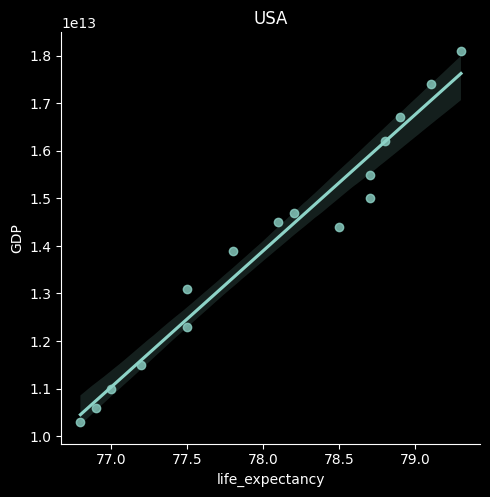

<Figure size 640x480 with 0 Axes>

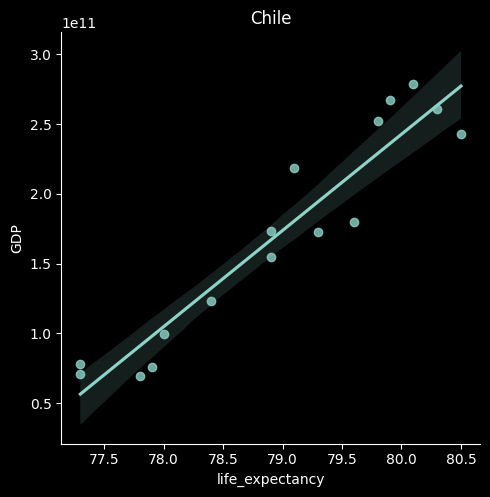

<Figure size 640x480 with 0 Axes>

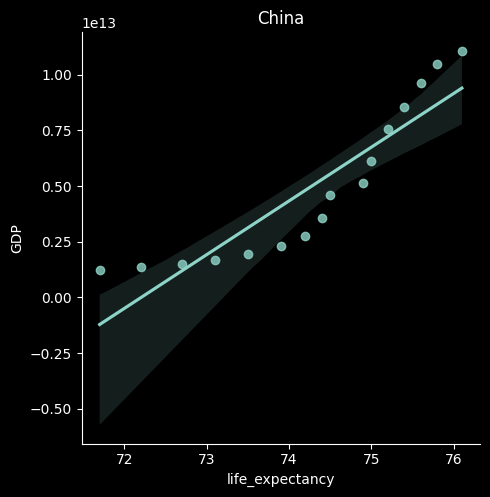

<Figure size 640x480 with 0 Axes>

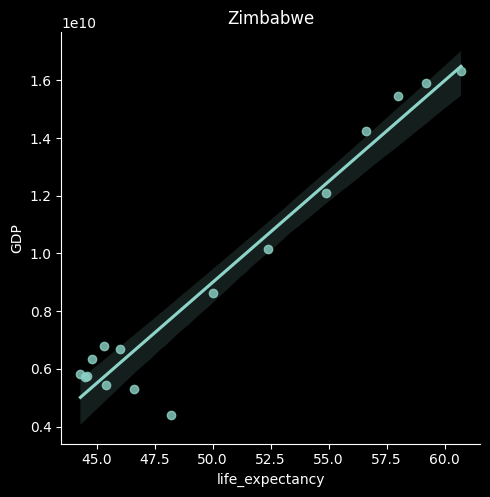

<Figure size 640x480 with 0 Axes>

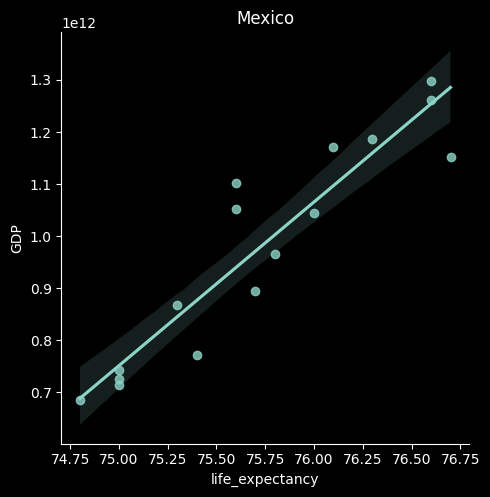

<Figure size 640x480 with 0 Axes>

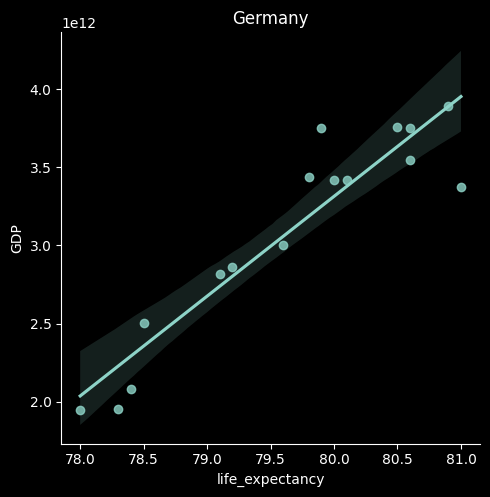

<Figure size 640x480 with 0 Axes>

In [44]:
i = 0
for country in countries:
    sns.lmplot(data= country, x= 'life_expectancy', y= 'GDP')
    plt.title(country_names[i])
    plt.show()
    plt.clf()
    i += 1

## Scaling each countries GDP by 1 Billion dollars for better interpretation in a regression model

In [45]:
for country in countries:
    country['GDP_Billions'] = country['GDP'] / 1000000000

## Importing the statsmodels api for regression modeling

In [46]:
import statsmodels.api as sm

## Checking if residual values are normally distributed

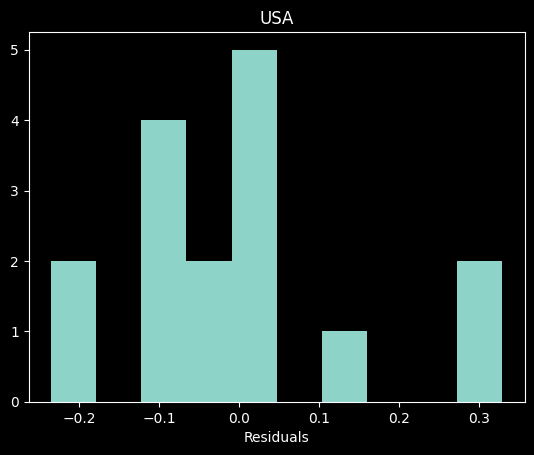

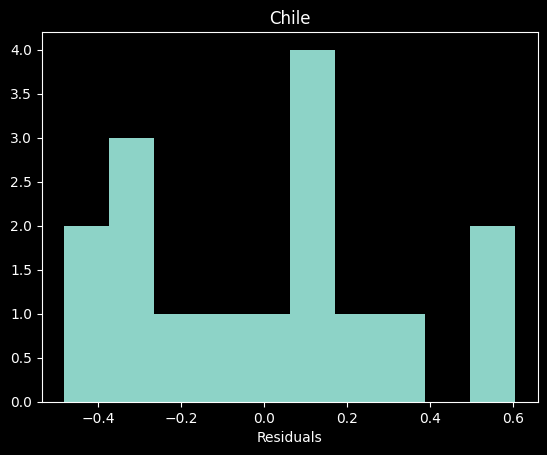

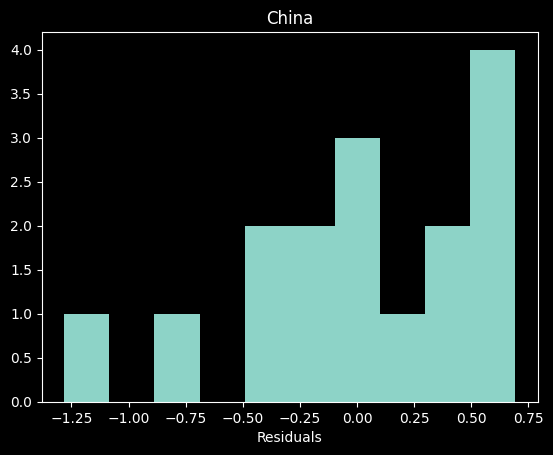

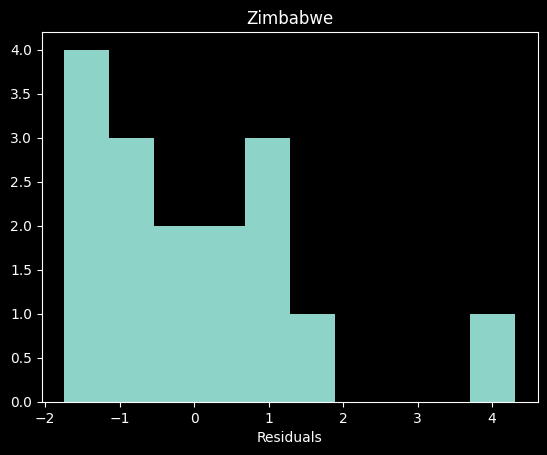

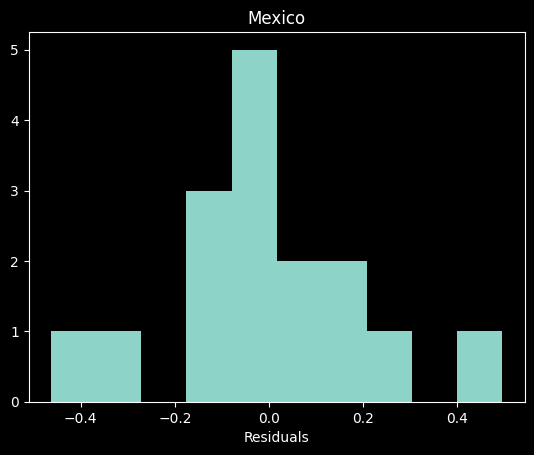

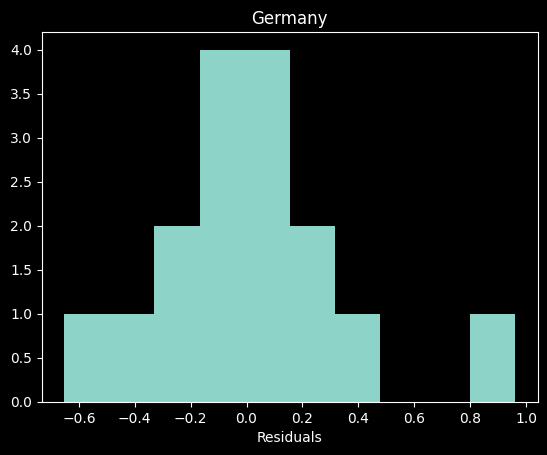

<Figure size 640x480 with 0 Axes>

In [47]:
i = 0
for country in countries:
    model = sm.OLS.from_formula('life_expectancy ~ GDP_Billions', country)
    results = model.fit()
    fitted_values = results.predict(country)
    residuals = country.life_expectancy - fitted_values
    plt.hist(residuals)
    plt.title(country_names[i])
    plt.xlabel('Residuals')
    plt.show()
    plt.clf()
    i += 1

## Checking homoscedasticity assumption

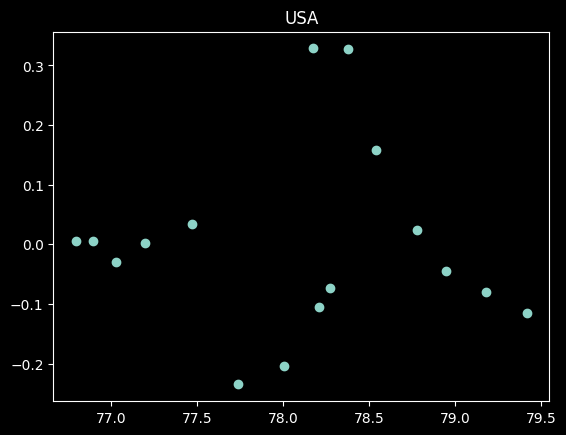

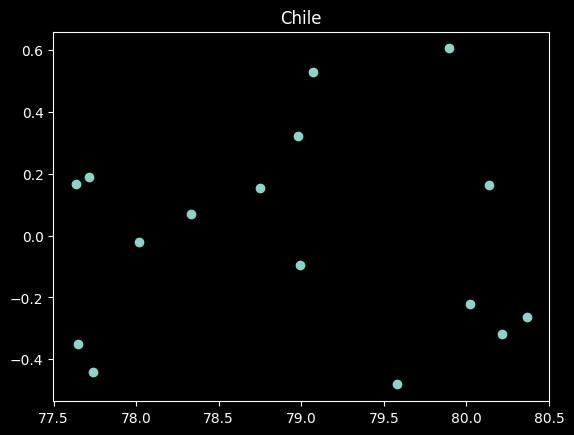

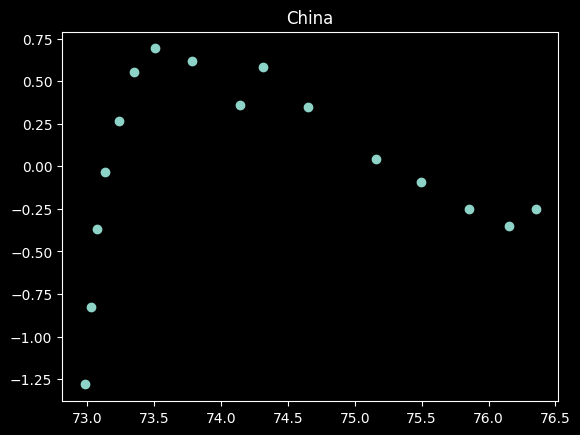

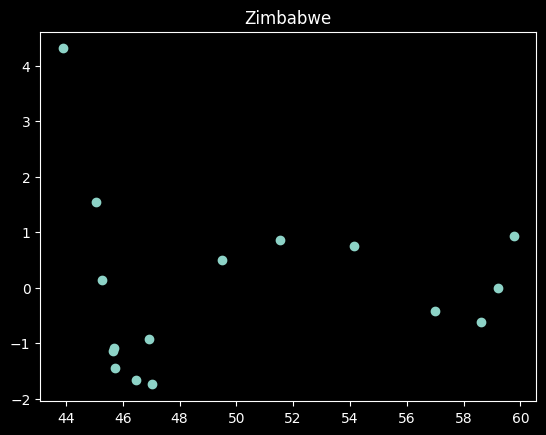

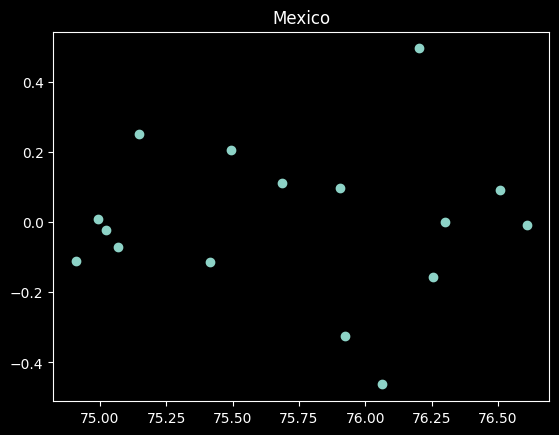

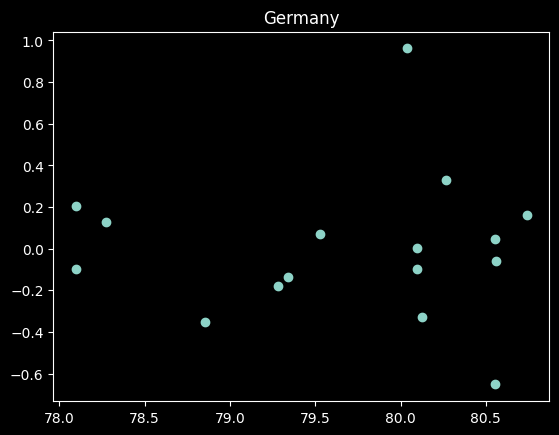

<Figure size 640x480 with 0 Axes>

In [48]:
i = 0
for country in countries:
    model = sm.OLS.from_formula('life_expectancy ~ GDP_Billions', country)
    results = model.fit()
    fitted_values = results.predict(country)
    residuals = country.life_expectancy - fitted_values
    plt.scatter(fitted_values, residuals)
    plt.title(country_names[i])
    plt.show()
    plt.clf()
    i += 1